**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,rudeadyet,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.068478,0.272657,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427032,1,1,1,0,0,0,1,1,0,1
1,2,normal,-0.004434,10,0.034060,-0.003763,5,0.972797,0.954078,0.000492,1.991445,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.420676,1,1,1,0,0,0,1,1,0,0
2,0,normal,-0.004383,6,0.465697,-0.003696,6,2.503716,1.228979,0.000492,1.009351,0.020996,0.020961,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426966,1,2,0,1,0,0,1,1,0,0
3,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.025583,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
4,0,normal,-0.004437,6,-0.122899,-0.003766,6,2.503716,1.228979,0.000492,1.009273,0.020662,0.020627,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426964,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439302,2,normal,-0.004434,10,0.073300,-0.003762,5,0.972797,0.954078,0.000492,1.991444,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.394997,1,1,1,0,0,0,1,1,0,0
439303,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.395117,1,1,1,0,0,0,1,0,1,0
439304,2,normal,-0.004434,10,0.073300,-0.003762,5,0.972797,0.954078,0.000492,1.991444,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.420131,1,1,1,0,0,0,1,1,0,0
439305,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,normal,-0.004383,6,0.465697,-0.003696,6,2.503716,1.228979,0.000492,1.009201,0.028962,0.028923,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426968,1,2,0,1,0,0,1,1,0,0
1,2,normal,-0.004434,6,0.073300,-0.003762,6,2.503716,1.228979,0.000492,1.009343,0.021669,0.021634,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426950,1,1,1,0,0,0,1,1,0,0
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026684,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,2,normal,-0.004434,8,0.073300,-0.003762,4,0.972797,0.679176,0.000492,1.500366,-0.033842,-0.033850,-0.277080,1.687889,-0.304226,0.363804,0.177140,-0.233301,0.024896,0.063188,1.188589,1,1,1,0,0,0,1,1,0,0
4,0,normal,-0.004383,10,0.465697,-0.003696,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.392148,1,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146431,0,rudeadyet,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.018061,0.272664,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.426917,1,1,1,0,0,0,1,1,0,1
146432,0,slowloris,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.526904,0.272717,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,0,1,1,0,1
146433,0,normal,-0.004437,13,-0.122899,-0.003766,7,1.090560,1.503881,0.000492,-0.463950,-0.033846,-0.033855,4.602953,3.100301,4.587800,0.594855,-0.025332,-0.233301,0.162128,0.063188,2.391199,1,1,1,0,0,0,1,0,1,0
146434,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,1.991443,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.398506,1,1,1,0,0,0,1,1,0,0


---------------------------------------

**Create Model & Train Model**

In [5]:
df_train.groupby('traffic')['traffic'].count()

traffic
apachekiller      1756
arpspoofing       8361
camoverflow      46934
mqttmalaria       3709
netscan          46767
normal          225000
rudeadyet        54088
slowloris        47685
slowread          5007
Name: traffic, dtype: int64

In [6]:
df_train = df_train.drop('is_attack', axis=1)
df_test = df_test.drop('is_attack', axis=1)

In [7]:
x_columns = df_train.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_train["traffic"].values)

x = df_train[x_columns].values
y = df_train["traffic"].values
y = le.transform(y)

In [8]:
x_columns_val = df_test.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_test["traffic"].values)

x_val = df_test[x_columns].values
y_val = df_test["traffic"].values
y_val = le.transform(y_val)

In [9]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
x_test.shape,y_test.shape

((109827, 30), (109827,))

In [11]:
x_train.shape,y_train.shape

((329480, 30), (329480,))

In [12]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Best_Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=512, callbacks=[monitor, checkpoint])

Train on 329480 samples, validate on 109827 samples
Epoch 1/300
329480/329480 [==============================] - 3s 8us/sample - loss: 1.0739 - accuracy: 0.6844 - val_loss: 0.3337 - val_accuracy: 0.9118
Epoch 2/300
329480/329480 [==============================] - 2s 5us/sample - loss: 0.5027 - accuracy: 0.8503 - val_loss: 0.2805 - val_accuracy: 0.9163
Epoch 3/300
329480/329480 [==============================] - 2s 5us/sample - loss: 0.4181 - accuracy: 0.8768 - val_loss: 0.2529 - val_accuracy: 0.9340
Epoch 4/300
329480/329480 [==============================] - 2s 5us/sample - loss: 0.3726 - accuracy: 0.8918 - val_loss: 0.2312 - val_accuracy: 0.9377
Epoch 5/300
329480/329480 [==============================] - 2s 5us/sample - loss: 0.3420 - accuracy: 0.9021 - val_loss: 0.2152 - val_accuracy: 0.9373
Epoch 6/300
329480/329480 [==============================] - 2s 5us/sample - loss: 0.3180 - accuracy: 0.9101 - val_loss: 0.2024 - val_accuracy: 0.9380
Epoch 7/300
329480/329480 [===============

329480/329480 [==============================] - 3s 9us/sample - loss: 0.1446 - accuracy: 0.9567 - val_loss: 0.1026 - val_accuracy: 0.9668
Epoch 55/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1439 - accuracy: 0.9568 - val_loss: 0.1031 - val_accuracy: 0.9704
Epoch 56/300
329480/329480 [==============================] - 3s 8us/sample - loss: 0.1423 - accuracy: 0.9572 - val_loss: 0.1046 - val_accuracy: 0.9695
Epoch 57/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1409 - accuracy: 0.9578 - val_loss: 0.0999 - val_accuracy: 0.9696
Epoch 58/300
329480/329480 [==============================] - 3s 8us/sample - loss: 0.1397 - accuracy: 0.9576 - val_loss: 0.0988 - val_accuracy: 0.9705
Epoch 59/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1386 - accuracy: 0.9583 - val_loss: 0.0987 - val_accuracy: 0.9688
Epoch 60/300
329480/329480 [==============================] - 3s 8us/sample - loss: 0.1391 - accuracy

Epoch 108/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1174 - accuracy: 0.9647 - val_loss: 0.0909 - val_accuracy: 0.9748
Epoch 109/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1164 - accuracy: 0.9651 - val_loss: 0.0877 - val_accuracy: 0.9717
Epoch 110/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1172 - accuracy: 0.9651 - val_loss: 0.0881 - val_accuracy: 0.9714
Epoch 111/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1164 - accuracy: 0.9648 - val_loss: 0.0862 - val_accuracy: 0.9731
Epoch 112/300
329480/329480 [==============================] - 3s 8us/sample - loss: 0.1159 - accuracy: 0.9652 - val_loss: 0.0867 - val_accuracy: 0.9715
Epoch 113/300
329480/329480 [==============================] - 3s 8us/sample - loss: 0.1161 - accuracy: 0.9654 - val_loss: 0.0859 - val_accuracy: 0.9743
Epoch 114/300
329480/329480 [==============================] - 3s 9us/sample - los

329480/329480 [==============================] - 3s 9us/sample - loss: 0.1078 - accuracy: 0.9679 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 162/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1079 - accuracy: 0.9680 - val_loss: 0.0858 - val_accuracy: 0.9714
Epoch 163/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1080 - accuracy: 0.9679 - val_loss: 0.0879 - val_accuracy: 0.9708
Epoch 164/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1071 - accuracy: 0.9684 - val_loss: 0.0841 - val_accuracy: 0.9719
Epoch 165/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.0840 - val_accuracy: 0.9719
Epoch 166/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1069 - accuracy: 0.9678 - val_loss: 0.0864 - val_accuracy: 0.9712
Epoch 167/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1073 - ac

329480/329480 [==============================] - 3s 9us/sample - loss: 0.1003 - accuracy: 0.9706 - val_loss: 0.0781 - val_accuracy: 0.9769
Epoch 214/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0998 - accuracy: 0.9707 - val_loss: 0.0775 - val_accuracy: 0.9768
Epoch 215/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1004 - accuracy: 0.9705 - val_loss: 0.0826 - val_accuracy: 0.9725
Epoch 216/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1004 - accuracy: 0.9704 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 217/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0999 - accuracy: 0.9708 - val_loss: 0.0777 - val_accuracy: 0.9765
Epoch 218/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.1011 - accuracy: 0.9704 - val_loss: 0.0775 - val_accuracy: 0.9772
Epoch 219/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0998 - ac

329480/329480 [==============================] - 3s 9us/sample - loss: 0.0975 - accuracy: 0.9719 - val_loss: 0.0775 - val_accuracy: 0.9769
Epoch 266/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0970 - accuracy: 0.9721 - val_loss: 0.0758 - val_accuracy: 0.9769
Epoch 267/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0964 - accuracy: 0.9721 - val_loss: 0.0761 - val_accuracy: 0.9771
Epoch 268/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0962 - accuracy: 0.9723 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 269/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0963 - accuracy: 0.9723 - val_loss: 0.0760 - val_accuracy: 0.9771
Epoch 270/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0964 - accuracy: 0.9720 - val_loss: 0.0772 - val_accuracy: 0.9769
Epoch 271/300
329480/329480 [==============================] - 3s 9us/sample - loss: 0.0968 - ac

In [13]:
# Load the best-saved model
best_model = load_model('Best_Model.h5')

# Evaluate the best-saved model
y_pred = best_model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_val, y_pred_classes)
print('')
print('Test accuracy:', acc)


Test accuracy: 0.9763719303996286


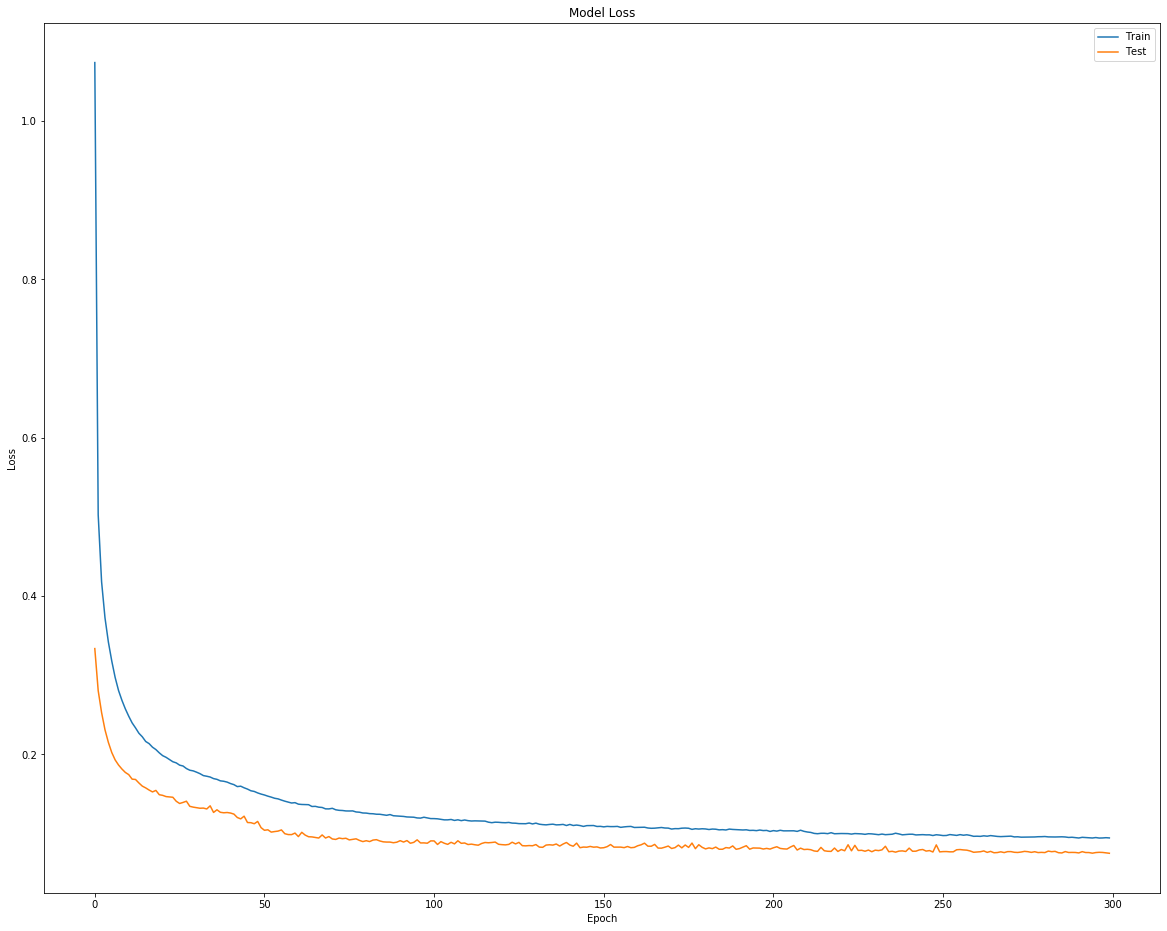

In [14]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

-------------------------------------

## Results

In [15]:
pred = model.predict(x_val)

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [17]:
pred_labels = np.argmax(pred, axis=1)

calculate_metrics("Neural Network", y_val, pred_labels, average='weighted')

--- Performance of Neural Network ---
Accuracy : 97.64%
Precision: 97.8%
Recall: 97.64%
F1-score: 97.63%
Balanced accuracy: 96.66%
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       578
           1       0.98      0.99      0.98      2861
           2       1.00      1.00      1.00     15566
           3       1.00      0.98      0.99      1252
           4       1.00      1.00      1.00     15733
           5       0.99      1.00      1.00     75000
           6       0.98      0.85      0.91     17902
           7       0.86      0.97      0.91     15811
           8       0.97      0.95      0.96      1733

    accuracy                           0.98    146436
   macro avg       0.97      0.97      0.97    146436
weighted avg       0.98      0.98      0.98    146436



In [18]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [19]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [20]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ATTACKS = [
    'Apache Killer', 'ARP Spoofing', 
    'CAM Overflow', 'MQTT Malaria', 
    'Netscan', 'Normal', 
    'RUDY', 'SlowLoris', 
    'SlowRead'
]
    
def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=ATTACKS)

    # Plot size
    fig, ax = plt.subplots(figsize=(11,11))
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=20, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=20, fontsize=11)

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_xticklabels(ATTACKS)
    ax.set_yticklabels(ATTACKS)
        
    ax.tick_params(axis='x', pad=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center', va='center')
    ax.tick_params(axis='y', pad=35)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)

In [22]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [23]:
print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_val, pred)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, pred, 1)

[METRICS] Decision Tree Classifier


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## 